## Data Exploration Normal

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
df = pd.read_csv('df_scrubalt.csv')

df.head()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,month
0,10/13/2014,221900,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.000000,98178,1340,5650,10
1,12/9/2014,538000,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.000000,98125,1690,7639,12
2,2/25/2015,180000,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,82.991949,98028,2720,8062,2
3,12/9/2014,604000,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.000000,98136,1360,5000,12
4,2/18/2015,510000,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.000000,98074,1800,7503,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21082 entries, 0 to 21081
Data columns (total 18 columns):
date             21082 non-null object
price            21082 non-null int64
bedrooms         21082 non-null int64
bathrooms        21082 non-null float64
sqft_living      21082 non-null int64
sqft_lot         21082 non-null int64
floors           21082 non-null float64
view             21082 non-null float64
condition        21082 non-null int64
grade            21082 non-null int64
sqft_above       21082 non-null int64
sqft_basement    21082 non-null float64
yr_built         21082 non-null int64
yr_renovated     21082 non-null float64
zipcode          21082 non-null int64
sqft_living15    21082 non-null int64
sqft_lot15       21082 non-null int64
month            21082 non-null int64
dtypes: float64(5), int64(12), object(1)
memory usage: 2.9+ MB


In [4]:

df.drop('sqft_living', axis=1, inplace=True)

In [3]:
df.describe()

,price,bedrooms,bathrooms,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,month
count,2.108000e+04,21080.000000,21080.000000,2.108000e+04,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000,21080.000000
mean,5.402607e+05,3.372486,1.750332,1.507894e+04,1.445636,0.233349,3.409867,7.657590,1789.068691,291.371015,1971.019545,82.922011,98077.855693,1986.983539,12733.613994,6.576471
std,3.667446e+05,0.924988,0.733371,4.117510e+04,0.551262,0.765099,0.650615,1.173673,828.371814,442.024086,29.321911,361.654418,53.530312,685.539809,27149.834582,3.114166
min,7.800000e+04,1.000000,0.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,399.000000,651.000000,1.000000
25%,3.220000e+05,3.000000,1.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98033.000000,1490.000000,5100.000000,4.000000
50%,4.500000e+05,3.000000,2.000000,7.620000e+03,1.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,1840.000000,7626.000000,6.000000
75%,6.450000e+05,4.000000,2.000000,1.069875e+04,2.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98117.000000,2360.000000,10089.000000,9.000000
max,7.700000e+06,33.000000,8.000000,1.651359e+06,3.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,6210.000000,871200.000000,12.000000


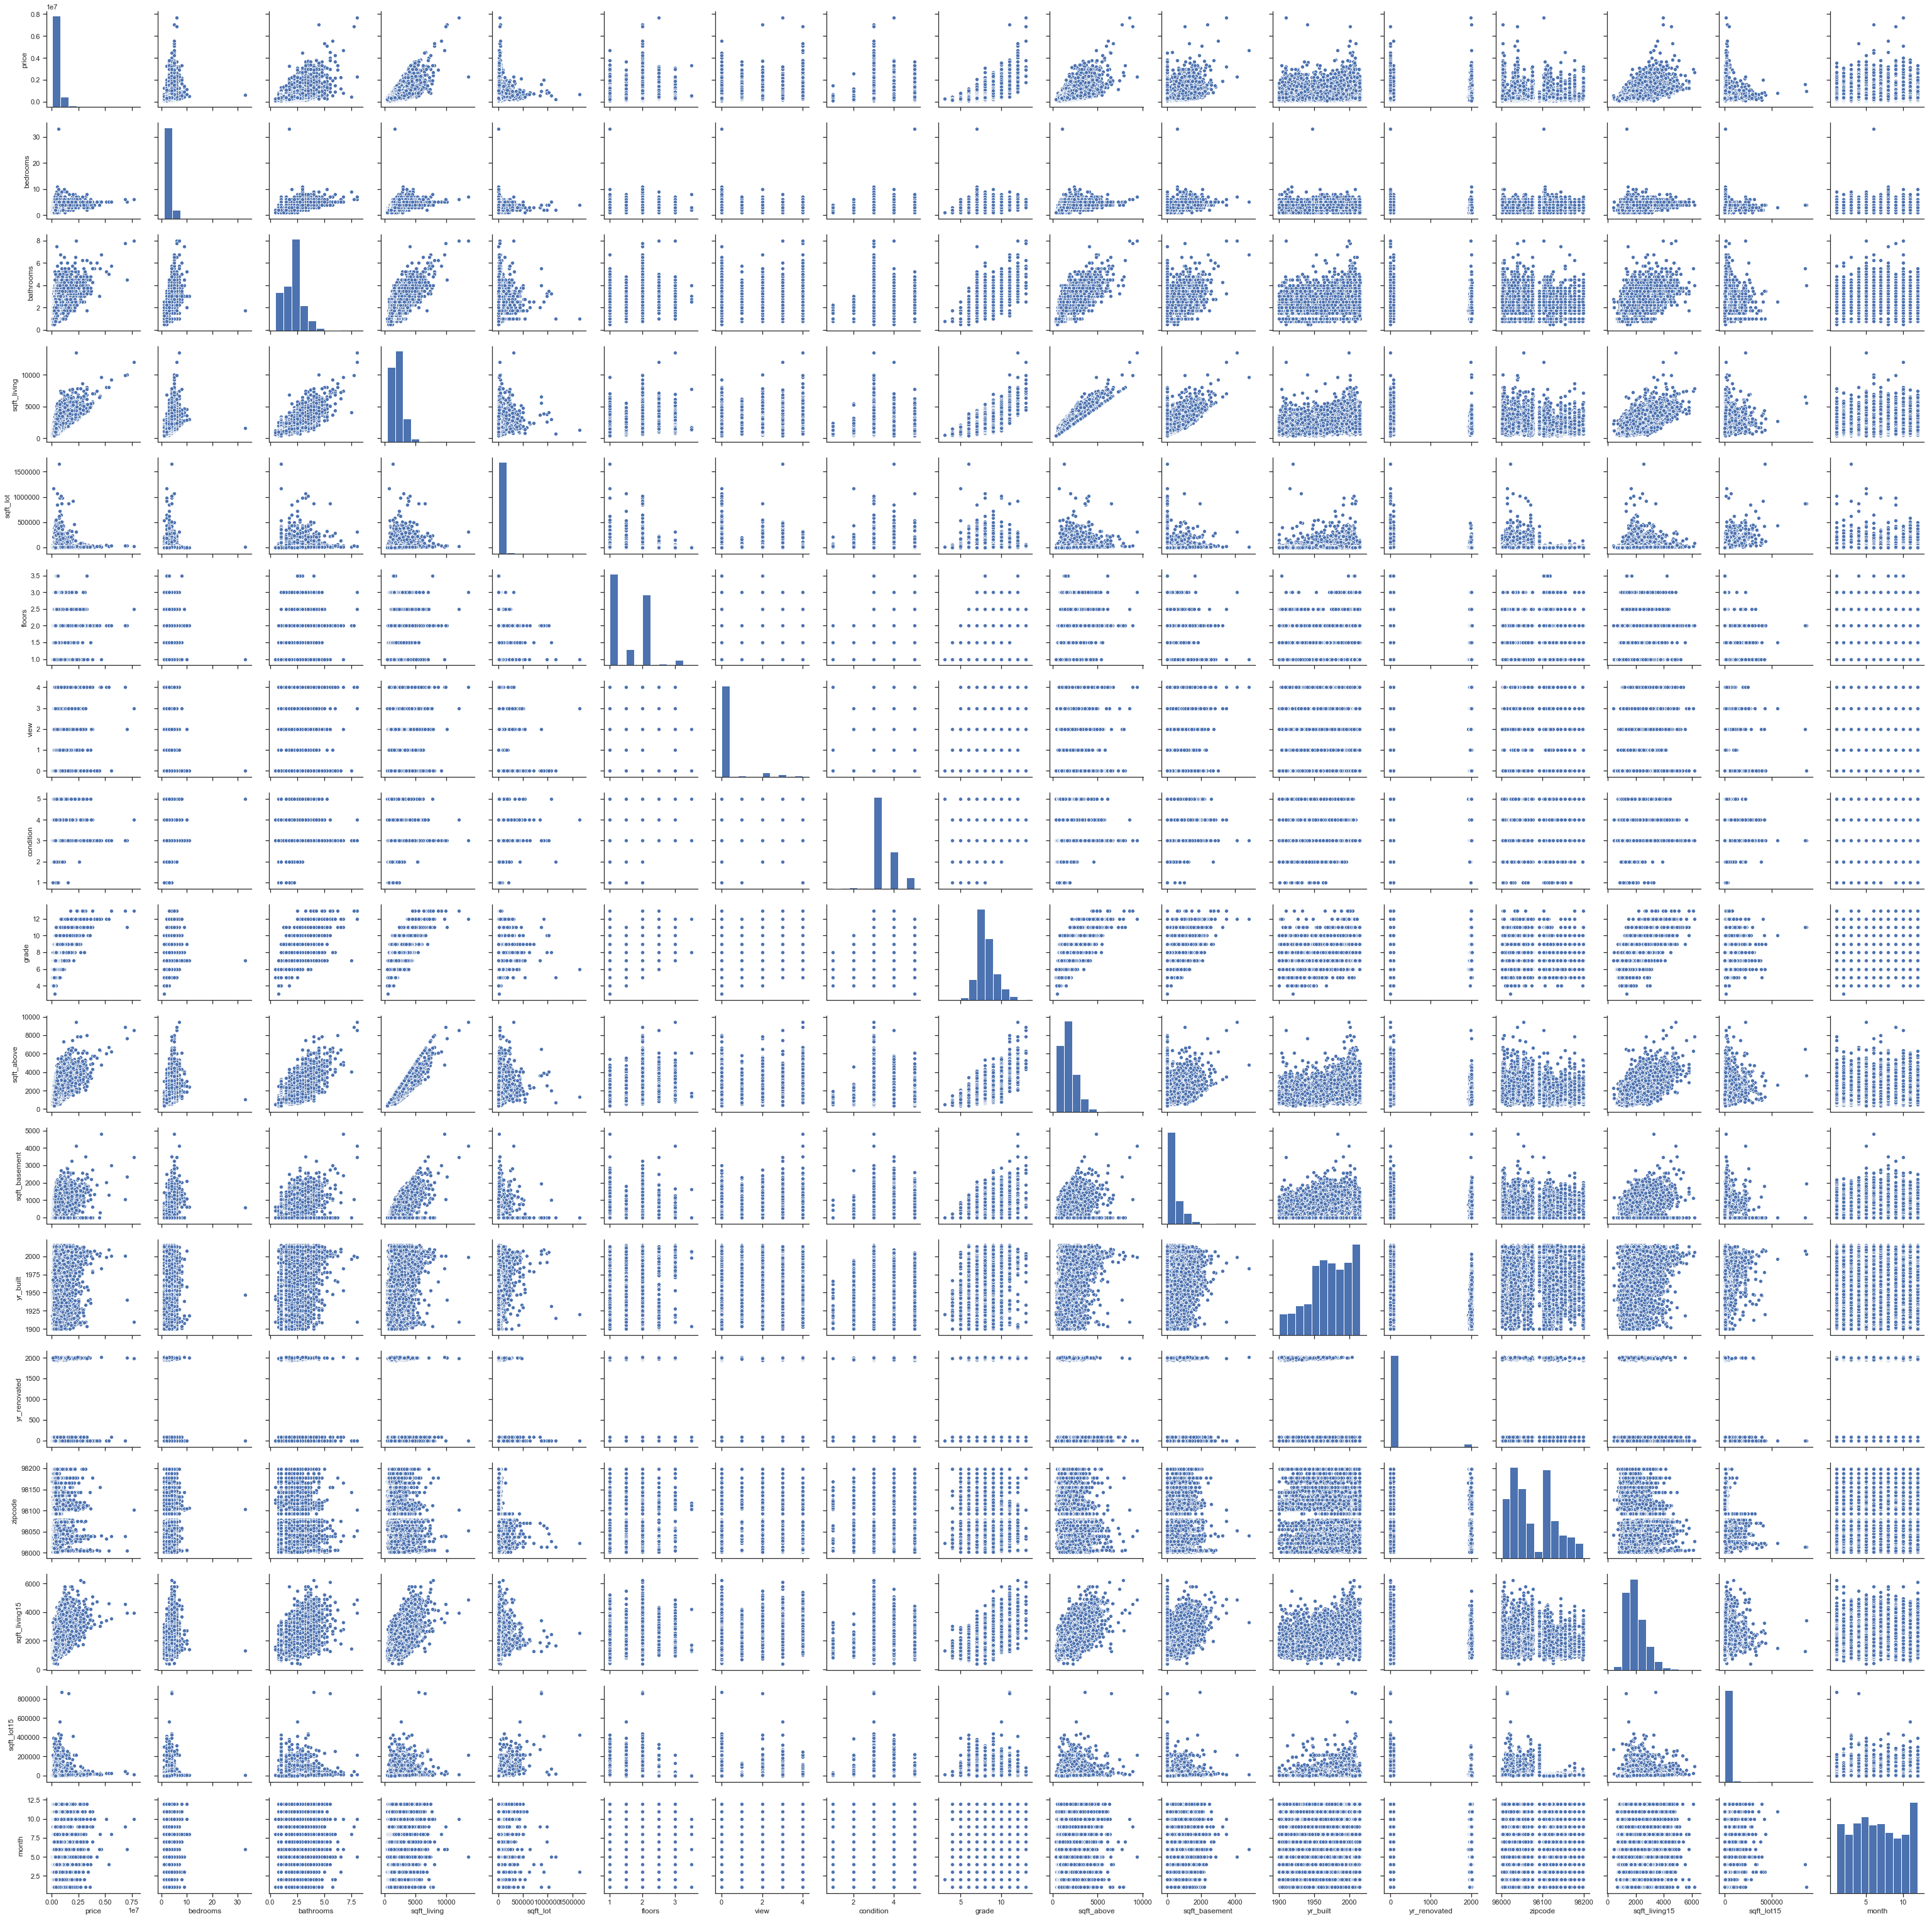

In [19]:
sns.pairplot(df);

Verifying that there is plenty of categorical data in the set, we will set certain features to category. As we are further manipulating data, we will save these changes to a new dataframe before modeling.

In [5]:
df.view=df.view.astype('category', inplace=True)
df.floors=df.floors.astype('category', inplace=True)
df.grade=df.grade.astype('category', inplace=True)
df.condition=df.condition.astype('category', inplace=True)
df.month=df.month.astype('category', inplace=True)
df.yr_renovated=df.yr_renovated.astype('category', inplace=True)

Now to one hot encode all of these initial category features

In [6]:
df_cat=pd.get_dummies(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21080 entries, 0 to 21596
Data columns (total 16 columns):
price            21080 non-null int64
bedrooms         21080 non-null int64
bathrooms        21080 non-null int64
sqft_lot         21080 non-null int64
floors           21080 non-null category
view             21080 non-null category
condition        21080 non-null category
grade            21080 non-null category
sqft_above       21080 non-null int64
sqft_basement    21080 non-null int64
yr_built         21080 non-null int64
yr_renovated     21080 non-null category
zipcode          21080 non-null int64
sqft_living15    21080 non-null int64
sqft_lot15       21080 non-null int64
month            21080 non-null category
dtypes: category(6), int64(10)
memory usage: 1.9 MB


In [7]:
df_cat.head()

,price,bedrooms,bathrooms,sqft_lot,sqft_above,sqft_basement,yr_built,zipcode,sqft_living15,sqft_lot15,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,221900,3,1.00,5650,1180,0.0,1955,98178,1340,5650,...,0,0,0,0,0,0,0,1,0,0
1,538000,3,2.25,7242,2170,400.0,1951,98125,1690,7639,...,0,0,0,0,0,0,0,0,0,1
2,180000,2,1.00,10000,770,0.0,1933,98028,2720,8062,...,0,0,0,0,0,0,0,0,0,0
3,604000,4,3.00,5000,1050,910.0,1965,98136,1360,5000,...,0,0,0,0,0,0,0,0,0,1
4,510000,3,2.00,8080,1680,0.0,1987,98074,1800,7503,...,0,0,0,0,0,0,0,0,0,0


In [13]:
list(df_cat)

['price',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'zipcode',
 'sqft_living15',
 'sqft_lot15',
 'bedrooms_1',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bedrooms_7',
 'bedrooms_8',
 'bedrooms_9',
 'bedrooms_10',
 'bedrooms_11',
 'bedrooms_33',
 'bathrooms_0.5',
 'bathrooms_0.75',
 'bathrooms_1.0',
 'bathrooms_1.25',
 'bathrooms_1.5',
 'bathrooms_1.75',
 'bathrooms_2.0',
 'bathrooms_2.25',
 'bathrooms_2.5',
 'bathrooms_2.75',
 'bathrooms_3.0',
 'bathrooms_3.25',
 'bathrooms_3.5',
 'bathrooms_3.75',
 'bathrooms_4.0',
 'bathrooms_4.25',
 'bathrooms_4.5',
 'bathrooms_4.75',
 'bathrooms_5.0',
 'bathrooms_5.25',
 'bathrooms_5.5',
 'bathrooms_5.75',
 'bathrooms_6.0',
 'bathrooms_6.25',
 'bathrooms_6.5',
 'bathrooms_6.75',
 'bathrooms_7.5',
 'bathrooms_7.75',
 'bathrooms_8.0',
 'floors_1.0',
 'floors_1.5',
 'floors_2.0',
 'floors_2.5',
 'floors_3.0',
 'floors_3.5',
 'view_0',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'cond

 scale all continuous data and visualize

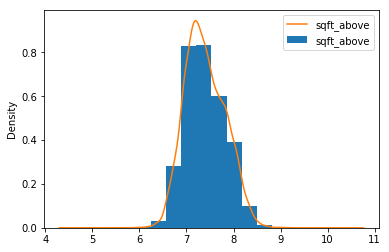

In [9]:
df['sqft_above'] = np.log(df['sqft_above'])
df['sqft_above'].plot.hist(density=True )
df['sqft_above'].plot.kde(label='sqft_above')
plt.legend()
plt.show()

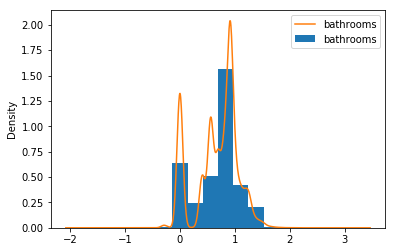

In [8]:
df['bathrooms'] = np.log(df['bathrooms'])

df['bathrooms'].plot.hist(density=True)
df['bathrooms'].plot.kde(label='bathrooms')
plt.legend()
plt.show()

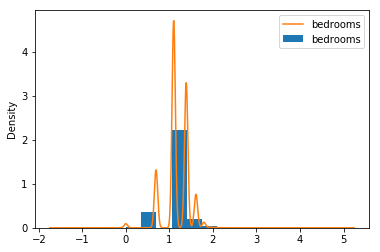

In [10]:
df['bedrooms'] = np.log(df['bedrooms'])
df['bedrooms'].plot.hist(density=True )
df['bedrooms'].plot.kde(label='bedrooms')
plt.legend()
plt.show()

C:\Users\Jason\Anaconda3\envs\learn-env\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


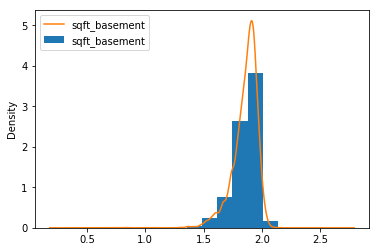

In [12]:
df['sqft_basement'] = np.log(df['sqft_basement'])
df['sqft_basement'] .plot.hist(density=True )
df['sqft_basement'] .plot.kde(label='sqft_basement')
plt.legend()
plt.show()

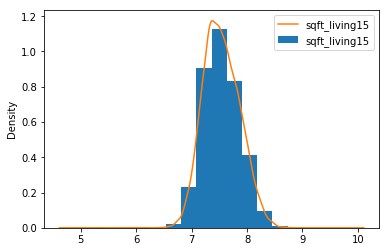

In [14]:
df['sqft_living15'] = np.log(df['sqft_living15'])
df['sqft_living15'].plot.hist(density=True )
df['sqft_living15'].plot.kde(label='sqft_living15')
plt.legend()
plt.show()

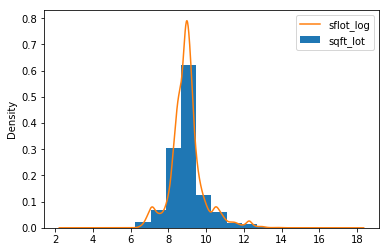

In [15]:
df['sqft_lot'] = np.log(df['sqft_lot'])
df['sqft_lot'].plot.hist(density=True )
df['sqft_lot'].plot.kde(label='sflot_log')
plt.legend()
plt.show()

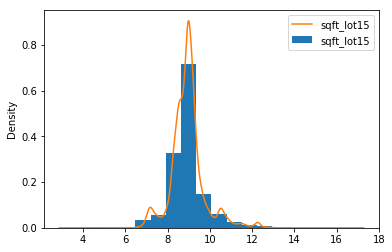

In [16]:
df['sqft_lot15'] = np.log(df['sqft_lot15'])
df['sqft_lot15'].plot.hist(density=True )
df['sqft_lot15'].plot.kde(label='sqft_lot15')
plt.legend()
plt.show()

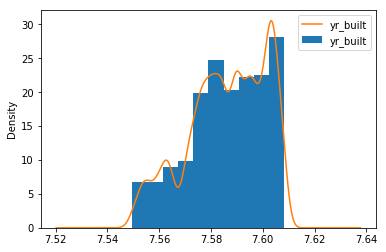

In [17]:
df['yr_built'] = np.log(df['yr_built'])
df['yr_built'].plot.hist(density=True )
df['yr_built'].plot.kde(label='yr_built')
plt.legend()
plt.show()

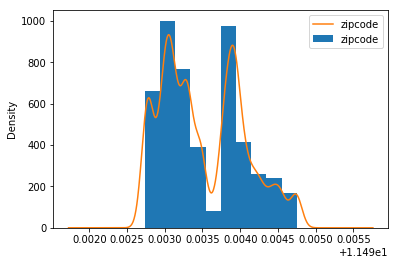

In [18]:
df['zipcode'] = np.log(df['zipcode'])
df['zipcode'].plot.hist(density=True )
df['zipcode'].plot.kde(label='zipcode')
plt.legend()
plt.show()

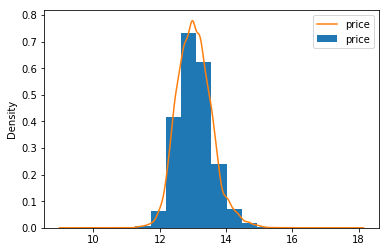

In [19]:
df['price'] = np.log(df['price'])
df['price'].plot.hist(density=True )
df['price'].plot.kde(label='price')
plt.legend()
plt.show()

In [23]:
df.sqft_basement.isna().sum()

12798

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21082 entries, 0 to 21081
Data columns (total 17 columns):
date             21082 non-null object
price            21082 non-null float64
bedrooms         21082 non-null float64
bathrooms        21082 non-null float64
sqft_lot         21082 non-null float64
floors           21082 non-null category
view             21082 non-null category
condition        21082 non-null category
grade            21082 non-null category
sqft_above       21082 non-null float64
sqft_basement    8284 non-null float64
yr_built         21082 non-null float64
yr_renovated     21082 non-null category
zipcode          21082 non-null float64
sqft_living15    21082 non-null float64
sqft_lot15       21082 non-null float64
month            21082 non-null category
dtypes: category(6), float64(10), object(1)
memory usage: 1.9+ MB


In [27]:
df.to_csv('df_explore.csv')

In [25]:
import statsmodels.formula.api as smf

In [26]:
col_names = df.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("Housing: Price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [df[val].min(), df[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

Housing: Price~bedrooms
------------------------------
['bedrooms', 0.11690843421819963, 12.298372771661576, 0.6366957310045342, 0.0]
Housing: Price~bathrooms
------------------------------
['bathrooms', 0.2699940039450913, 12.575420361580498, 0.6975426264753333, 0.0]
Housing: Price~sqft_lot
------------------------------
['sqft_lot', 0.01912643850674478, 12.322118552262053, 0.08076135917588723, 1.5829053475978766e-90]
Housing: Price~sqft_above
------------------------------
['sqft_above', 0.3431824253940696, 7.707525685549397, 0.7221650180792525, 0.0]
Housing: Price~sqft_basement
------------------------------
['sqft_basement', 0.09543154142090038, 10.3552117810054, 1.5248355232230772, 1.1926744701868421e-182]
Housing: Price~yr_built
------------------------------
['yr_built', 0.006334731497952939, -8.236725287717718, 2.805746037712723, 5.581153245557261e-31]
Housing: Price~zipcode
------------------------------
['zipcode', 0.0014818188640461916, 439.817429173385, -37.131299404854616,

In [42]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
formula = 'price~yr_built+zipcode+sqft_lot15+bedrooms+bathrooms+sqft_living15+sqft_above'
model=ols(formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.529
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     3378.
Date:                Mon, 04 Mar 2019   Prob (F-statistic):               0.00
Time:                        16:48:29   Log-Likelihood:                -8454.0
No. Observations:               21082   AIC:                         1.692e+04
Df Residuals:                   21074   BIC:                         1.699e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      -901.0945     59.302    -15.195      0.000   -1017.332    -784.857
yr_built        -11.2159      0.212    -52.977      0.000     -11.631     -10.801
zipcode          86.2932      5.117     16.865      0.000      76.264      96.322
sqft_lot15       -0.0677      0.004    -19.309      0.000      -0.075      -0.061
bedrooms         -0.1419      0.011    -12.789      0.000      -0.164      -0.120
bathrooms         0.4027      0.010     39.988      0.000       0.383       0.422
sqft_living15     0.6388      0.011     55.767      0.000       0.616       0.661
sqft_above        0.4193      0.010     41.789      0.000       0.400       0.439
==============================================================================
Omnibus:                       71.267   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.326
Skew:                           0.076   Prob(JB):                     2.96e-19
Kurtosis:                       3.272   Cond. No.                     4.69e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.69e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
y = df[["price"]]
X = df(['yr_built','zipcode','sqft_lot15','bedrooms','bathrooms','sqft_living15','sqft_above'])

KeyError: ('yr_built', 'zipcode', 'sqft_lot15', 'bedrooms', 'bathrooms', 'sqft_living15', 'sqft_above')

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [39]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

16865 4217 16865 4217


In [36]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

ValueError: could not convert string to float: '1/14/2015'

In [58]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [59]:
mse_train = np.sum((y_train-y_hat_train)**2)/len(y_train)
mse_test =np.sum((y_test-y_hat_test)**2)/len(y_test)
print('Train Mean Squarred Error:', mse_train)
print('Test Mean Squarred Error:', mse_test)

Train Mean Squarred Error: price    0.094238
dtype: float64
Test Mean Squarred Error: price    0.095017
dtype: float64


In [20]:
dfnn=pd.read_csv('df_scrub.csv')
dfnn=dfnn.set_index('Unnamed: 0')
outcome='price'
predictors = df['sqft_above',]
pred_sum = '+'.join(predictors)
formula = outcome + '~' + pred_sum
model=ols(formula, data=dfnn).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.640
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     2494.
Date:                Sun, 03 Mar 2019   Prob (F-statistic):               0.00
Time:                        14:46:33   Log-Likelihood:            -2.8924e+05
No. Observations:               21080   AIC:                         5.785e+05
Df Residuals:                   21064   BIC:                         5.786e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      8.389e+06   3.22e+06      2.602      0.009    2.07e+06    1.47e+07
bedrooms      -4.219e+04   2103.072    -20.061      0.000   -4.63e+04   -3.81e+04
bathrooms      4.459e+04   3613.965     12.337      0.000    3.75e+04    5.17e+04
sqft_living     111.3649      2.519     44.208      0.000     106.427     116.302
sqft_lot         -0.0453      0.053     -0.849      0.396      -0.150       0.059
floors         2.783e+04   3967.014      7.014      0.000       2e+04    3.56e+04
view           7.028e+04   2184.119     32.178      0.000     6.6e+04    7.46e+04
condition      2.108e+04   2594.515      8.126      0.000     1.6e+04    2.62e+04
grade          1.191e+05   2332.522     51.047      0.000    1.14e+05    1.24e+05
sqft_above       54.6759      2.439     22.419      0.000      49.896      59.456
sqft_basement    56.6988      2.897     19.572      0.000      51.020      62.377
yr_built      -3561.5463     76.327    -46.662      0.000   -3711.152   -3411.940
yr_renovated     20.6235      4.423      4.663      0.000      11.954      29.293
zipcode         -22.3090     32.358     -0.689      0.491     -85.733      41.115
sqft_living15    20.9178      3.759      5.564      0.000      13.549      28.286
sqft_lot15       -0.5248      0.081     -6.444      0.000      -0.684      -0.365
month         -2516.8904    487.376     -5.164      0.000   -3472.185   -1561.596
==============================================================================
Omnibus:                    16578.197   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1248641.697
Skew:                           3.225   Prob(JB):                         0.00
Kurtosis:                      40.148   Cond. No.                     1.22e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.44e-20. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [2]:
dfnn.head()

NameError: name 'dfnn' is not defined

SyntaxError: invalid syntax (<ipython-input-1-d5c30ea88ef5>, line 1)

In [25]:
col_names =df_cat.describe().columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("Housing: Price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df_cat).fit()
    X_new = pd.DataFrame({val: [df_cat[val].min(), df_cat[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

Housing: Price~bedrooms
------------------------------
['bedrooms', 0.09512358395467313, 127857.49645508401, 122284.63778943973, 0.0]
Housing: Price~bathrooms
------------------------------
['bathrooms', 0.2594333605883916, 94426.76967528833, 254713.9114357513, 0.0]
Housing: Price~sqft_living
------------------------------
['sqft_living', 0.4928061323665257, -43291.3597363557, 280.49457775327465, 0.0]
Housing: Price~sqft_lot
------------------------------
['sqft_lot', 0.00781244745906251, 528389.5235098678, 0.787268192051153, 7.813324294198454e-38]
Housing: Price~sqft_above
------------------------------
['sqft_above', 0.36659308093923015, 60684.504614436286, 268.0591276255718, 0.0]
Housing: Price~sqft_basement
------------------------------
['sqft_basement', 0.10434798469029638, 462168.75454526115, 268.01548023809664, 0.0]
Housing: Price~yr_built
------------------------------
['yr_built', 0.003014324432821902, -813236.739365309, 686.699145214066, 1.5009699532086241e-15]
Housing: Pric

['yr_renovated_1968', 4.671696261504543e-06, 540274.07207934, -46990.73874601364, 0.7536760087647514]
Housing: Price~yr_renovated_1969
------------------------------
['yr_renovated_1969', 1.7498453230846422e-07, 540262.8105427951, -11137.810542858933, 0.9515735579518557]
Housing: Price~yr_renovated_1970
------------------------------
['yr_renovated_1970', 9.412991311963381e-07, 540268.0506383181, -17223.606193857864, 0.8879841818175461]
Housing: Price~yr_renovated_1971
------------------------------
['yr_renovated_1971', 2.7755308751320484e-06, 540264.905356041, -88709.90535622658, 0.8088805180008408]
Housing: Price~yr_renovated_1972
------------------------------
['yr_renovated_1972', 1.71393400434372e-05, 540278.810789011, -127278.81078902373, 0.5478086605289753]
Housing: Price~yr_renovated_1973
------------------------------
['yr_renovated_1973', 2.339545415996902e-05, 540285.1345131878, -128785.13451315704, 0.482537301881081]
Housing: Price~yr_renovated_1974
-----------------------

['month_3', 1.8007521459084685e-05, 539780.7199854548, 5525.897163644232, 0.5378404440095383]
Housing: Price~month_4
------------------------------
['month_4', 0.0003792324122727786, 537838.9089706964, 23482.65588670906, 0.004691221313082847]
Housing: Price~month_5
------------------------------
['month_5', 8.477165575360157e-05, 539060.3703980758, 10698.895141034218, 0.1813103923421906]
Housing: Price~month_6
------------------------------
['month_6', 0.0002892045251290387, 538171.943494776, 20710.68961905176, 0.013544299663193786]
Housing: Price~month_7
------------------------------
['month_7', 1.5892698092101476e-05, 539766.3244700533, 4818.019034339184, 0.5627407073541746]
Housing: Price~month_8
------------------------------
['month_8', 1.293818065661867e-05, 540675.162097361, -4612.947208237495, 0.6015221358372729]
Housing: Price~month_9
------------------------------
['month_9', 9.059813982725817e-05, 541300.1670712172, -12761.809470753258, 0.16700005346153413]
Housing: Price~m

In [8]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
outcome='price'
predictors = 'sqft_above','sqft_lot','month_4','month_2','yr_renovated_2014', 'grade_13','grade_9', 'grade_6', 'grade_4'
pred_sum = '+'.join(predictors)
formula = outcome + '~' + pred_sum
model=ols(formula, data=df_cat).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     3581.
Date:                Sun, 03 Mar 2019   Prob (F-statistic):               0.00
Time:                        21:14:45   Log-Likelihood:            -2.9565e+05
No. Observations:               21080   AIC:                         5.913e+05
Df Residuals:                   21076   BIC:                         5.913e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.959e+06   4.48e+04    -43.773      0.000   -2.05e+06   -1.87e+06
bathrooms   1.392e+05   3785.057     36.781      0.000    1.32e+05    1.47e+05
sqft_above  2.851e+05   7148.544     39.881      0.000    2.71e+05    2.99e+05
sqft_lot    1.073e+04   2446.560      4.386      0.000    5935.655    1.55e+04
==============================================================================
Omnibus:                    17452.451   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1079445.121
Skew:                           3.586   Prob(JB):                         0.00
Kurtosis:                      37.315   Cond. No.                         262.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
df_cat['bath05']=df_cat['bathrooms_0.5']

In [23]:

df_cat['bath05']=df_cat(['bathrooms_0.5'], inplace=True)
df_cat['bath075']=df_cat['bathrooms_0.75']
df_cat['bath1']=df_cat['bathrooms_1.0']
df_cat['bath125']=df_cat['bathrooms_1.25']
df_cat['bath15']=df_cat['bathrooms_1.5']
df_cat['bath175']=df_cat['bathrooms_1.75']
df_cat['bath2']=df_cat['bathrooms_2.0']
df_cat['bath225']=df_cat['bathrooms_2.25']
df_cat['bath25']=df_cat['bathrooms_2.5']
df_cat['bath275']=df_cat['bathrooms_2.75']
df_cat['bath3']=df_cat['bathrooms_3.0']
df_cat['bath325']=df_cat['bathrooms_3.25']
df_cat['bath35']=df_cat['bathrooms_3.5']
df_cat['bath375']=df_cat['bathrooms_3.75']
df_cat['bath4']=df_cat['bathrooms_4.0']
df_cat['bath425']=df_cat['bathrooms_4.25']
df_cat['bath45']=df_cat['bathrooms_4.5']
df_cat['bath475']=df_cat['bathrooms_4.75']
df_cat['bath5']=df_cat['bathrooms_5.0']
df_cat['bath525']=df_cat['bathrooms_5.25']
df_cat['bath55']=df_cat['bathrooms_5.5']
df_cat['bath575']=df_cat['bathrooms_5.75']
df_cat['bath6']=df_cat['bathrooms_6.0']
df_cat['bath625']=df_cat['bathrooms_6.25']
df_cat['bath65']=df_cat['bathrooms_6.5']
df_cat['bath675']=df_cat['bathrooms_6.75']
df_cat['bath75']=df_cat['bathrooms_7.5']
df_cat['bath775']=df_cat['bathrooms_7.75']
df_cat['bath8']=df_cat['bathrooms_8.0']
df_cat['flr1']=df_cat['floors_1.0']
df_cat['flr15']=df_cat['floors_1.5']
df_cat['flr2']=df_cat['floors_2.0'] 
df_cat['flr25']=df_cat['floors_2.5']
df_cat['flr3']=df_cat['floors_3.0']
df_cat['flr35']=df_cat['floors_3.5']

In [26]:
df_cat.drop('bathrooms_0.5')

KeyError: "['bathrooms_0.5'] not found in axis"

In [48]:
list(df_cat)

['price',
 'sqft_living',
 'sqft_lot',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'zipcode',
 'sqft_living15',
 'sqft_lot15',
 'bedrooms_1',
 'bedrooms_2',
 'bedrooms_3',
 'bedrooms_4',
 'bedrooms_5',
 'bedrooms_6',
 'bedrooms_7',
 'bedrooms_8',
 'bedrooms_9',
 'bedrooms_10',
 'bedrooms_11',
 'bedrooms_33',
 'view_0',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'condition_1',
 'condition_2',
 'condition_3',
 'condition_4',
 'condition_5',
 'grade_3',
 'grade_4',
 'grade_5',
 'grade_6',
 'grade_7',
 'grade_8',
 'grade_9',
 'grade_10',
 'grade_11',
 'grade_12',
 'grade_13',
 'yr_renovated_0',
 'yr_renovated_82',
 'yr_renovated_1934',
 'yr_renovated_1940',
 'yr_renovated_1944',
 'yr_renovated_1945',
 'yr_renovated_1948',
 'yr_renovated_1950',
 'yr_renovated_1951',
 'yr_renovated_1953',
 'yr_renovated_1954',
 'yr_renovated_1955',
 'yr_renovated_1956',
 'yr_renovated_1957',
 'yr_renovated_1958',
 'yr_renovated_1959',
 'yr_renovated_1960',
 'yr_renovated_1962',
 'yr_renovated_1963',
 'y

In [46]:
df_cat=df_cat.columns.drop(['bathrooms_0.5',
 'bathrooms_0.75',
 'bathrooms_1.0',
 'bathrooms_1.25',
 'bathrooms_1.5',
 'bathrooms_1.75',
 'bathrooms_2.0',
 'bathrooms_2.25',
 'bathrooms_2.5',
 'bathrooms_2.75',
 'bathrooms_3.0',
 'bathrooms_3.25',
 'bathrooms_3.5',
 'bathrooms_3.75',
 'bathrooms_4.0',
 'bathrooms_4.25',
 'bathrooms_4.5',
 'bathrooms_4.75',
 'bathrooms_5.0',
 'bathrooms_5.25',
 'bathrooms_5.5',
 'bathrooms_5.75',
 'bathrooms_6.0',
 'bathrooms_6.25',
 'bathrooms_6.5',
 'bathrooms_6.75',
 'bathrooms_7.5',
 'bathrooms_7.75',
 'bathrooms_8.0',
 'floors_1.0',
 'floors_1.5',
 'floors_2.0',
 'floors_2.5',
 'floors_3.0',
 'floors_3.5'])

In [53]:
df_cat.head()

AttributeError: 'Index' object has no attribute 'head'

In [52]:
col_names = df_cat.columns.drop(['price'])
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
for idx, val in enumerate(col_names):
    print ("Housing: Price~" + val)
    print ("------------------------------")

    f = 'price~' + val
    model = smf.ols(formula=f, data=df).fit()
    X_new = pd.DataFrame({val: [df_cat[val].min(), df_cat[val].max()]});
    preds = model.predict(X_new)
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
    print(results[idx+1])

AttributeError: 'Index' object has no attribute 'columns'